In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [51]:
water_file = "Resources/willamette_water_gage.csv"
fish_file = "Resources/willamette_daily_salmon.csv"
annual_image_path = "Annual_Images/"
daily_image_path = "Daily_Images/"

In [3]:
willamette_water_gage = pd.read_csv(water_file, sep="\t")
willamette_salmon_df = pd.read_csv(fish_file, sep=",")

In [4]:
willamette_water_gage.head()

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,10/01/2007 01:00,PDT,3.21,A,NaN,NaN
1,USGS,14211720,10/01/2007 01:30,PDT,3.12,A,NaN,NaN
2,USGS,14211720,10/01/2007 02:00,PDT,2.89,A,NaN,NaN
3,USGS,14211720,10/01/2007 02:30,PDT,2.65,A,NaN,NaN
4,USGS,14211720,10/01/2007 03:00,PDT,2.38,A,NaN,NaN


In [5]:
willamette_salmon_df.head()

,Project,Date,Chinook Run,Chin,JChin,Stlhd,WStlhd,Sock,Coho,JCoho,Shad,Lmpry,BTrout,Chum,Pink,TempC
0,Willamette Falls,3/1/2009,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Willamette Falls,3/2/2009,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,Willamette Falls,3/3/2009,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,Willamette Falls,3/4/2009,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6
4,Willamette Falls,3/5/2009,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1


In [6]:
willamette_water_gage.dtypes

agency_cd          object
site_no             int64
datetime           object
tz_cd              object
gage_height_ft    float64
gage_status        object
temp              float64
temp_status        object
dtype: object

In [7]:
willamette_salmon_df['Date'] = pd.to_datetime(willamette_salmon_df['Date'])
willamette_salmon_df.head()

,Project,Date,Chinook Run,Chin,JChin,Stlhd,WStlhd,Sock,Coho,JCoho,Shad,Lmpry,BTrout,Chum,Pink,TempC
0,Willamette Falls,2009-03-01,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Willamette Falls,2009-03-02,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,Willamette Falls,2009-03-03,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,Willamette Falls,2009-03-04,NaN,NaN,NaN,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6
4,Willamette Falls,2009-03-05,NaN,NaN,NaN,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1


In [8]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['Chinook Run', 'JChin', 'Stlhd', 'WStlhd', 'Sock', 'Coho', 'JCoho', 'Shad', 'Lmpry', 'BTrout', 'Chum', 'Pink', 'TempC'])
willamette_salmon_df["Chin"] = willamette_salmon_df["Chin"].fillna(0)

In [9]:
willamette_salmon_df.head()

,Project,Date,Chin
0,Willamette Falls,2009-03-01,0.0
1,Willamette Falls,2009-03-02,0.0
2,Willamette Falls,2009-03-03,0.0
3,Willamette Falls,2009-03-04,0.0
4,Willamette Falls,2009-03-05,0.0


In [10]:
willamette_salmon_df['Date'] = willamette_salmon_df['Date'].astype(str)
willamette_salmon_df[['year','month','day']] = willamette_salmon_df['Date'].str.split('-', expand=True)


In [11]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['Date'])
willamette_salmon_df.head()

,Project,Chin,year,month,day
0,Willamette Falls,0.0,2009,03,01
1,Willamette Falls,0.0,2009,03,02
2,Willamette Falls,0.0,2009,03,03
3,Willamette Falls,0.0,2009,03,04
4,Willamette Falls,0.0,2009,03,05


In [12]:
willamette_salmon_df["date"] = willamette_salmon_df["month"]+"/"+willamette_salmon_df["day"]+"/"+willamette_salmon_df["year"]
willamette_salmon_df.head()

,Project,Chin,year,month,day,date
0,Willamette Falls,0.0,2009,03,01,03/01/2009
1,Willamette Falls,0.0,2009,03,02,03/02/2009
2,Willamette Falls,0.0,2009,03,03,03/03/2009
3,Willamette Falls,0.0,2009,03,04,03/04/2009
4,Willamette Falls,0.0,2009,03,05,03/05/2009


In [13]:
willamette_salmon_df = willamette_salmon_df.drop(columns=['month', 'day', 'year'])
willamette_salmon_df.head()

,Project,Chin,date
0,Willamette Falls,0.0,03/01/2009
1,Willamette Falls,0.0,03/02/2009
2,Willamette Falls,0.0,03/03/2009
3,Willamette Falls,0.0,03/04/2009
4,Willamette Falls,0.0,03/05/2009


In [14]:
willamette_water_gage[['date', 'time']] = willamette_water_gage['datetime'].str.split(' ', expand=True)
willamette_water_gage = willamette_water_gage.drop(columns=['time', 'temp_status', 'gage_status', 'datetime', 'tz_cd', 'agency_cd'])
willamette_water_gage.head()

,site_no,gage_height_ft,temp,date
0,14211720,3.21,NaN,10/01/2007
1,14211720,3.12,NaN,10/01/2007
2,14211720,2.89,NaN,10/01/2007
3,14211720,2.65,NaN,10/01/2007
4,14211720,2.38,NaN,10/01/2007


In [15]:
willamette_water_gage = willamette_water_gage.groupby('date').mean()
willamette_water_gage.head()

,site_no,gage_height_ft,temp
date,,,
01/01/2008,14211720,4.518750,NaN
01/01/2009,14211720,7.058542,NaN
01/01/2010,14211720,6.004375,4.583333
01/01/2011,14211720,7.869583,5.570833
01/01/2012,14211720,7.299479,7.233333


In [16]:
daily_salmon_willamette = pd.merge(willamette_salmon_df, willamette_water_gage, on="date")
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,6.470833
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,6.500000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,6.864583
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,7.439583
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,7.960417


In [17]:
# Create a Farenhieght Temperature
daily_salmon_willamette['temp_f'] = daily_salmon_willamette['temp'] * 1.8 + 32

# Get rid of any rows that don't have a temp
daily_salmon_willamette[daily_salmon_willamette.isna().any(axis=1)]
daily_salmon_willamette = daily_salmon_willamette.drop(columns=['temp'])
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [18]:
daily_salmon_willamette[['month','day','year']] = daily_salmon_willamette['date'].str.split('/', expand=True)
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f,month,day,year
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750,03,01,2009
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000,03,02,2009
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625,03,03,2009
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125,03,04,2009
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875,03,05,2009


In [19]:
daily_salmon_willamette['month'] = daily_salmon_willamette['month'].astype(int)
daily_salmon_willamette['day'] = daily_salmon_willamette['day'].astype(int)
daily_salmon_willamette['year'] = daily_salmon_willamette['year'].astype(int)

In [20]:
daily_salmon_willamette= daily_salmon_willamette[(daily_salmon_willamette['month'] >= 3) & (daily_salmon_willamette['month'] <= 5)]
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f,month,day,year
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750,3,1,2009
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000,3,2,2009
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625,3,3,2009
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125,3,4,2009
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875,3,5,2009


In [21]:
daily_salmon_willamette = daily_salmon_willamette.drop(columns=['month', 'day', 'year'])
daily_salmon_willamette.head()

,Project,Chin,date,site_no,gage_height_ft,temp_f
0,Willamette Falls,0.0,03/01/2009,14211720,4.325625,43.64750
1,Willamette Falls,0.0,03/02/2009,14211720,4.332292,43.70000
2,Willamette Falls,0.0,03/03/2009,14211720,4.389792,44.35625
3,Willamette Falls,0.0,03/04/2009,14211720,4.468542,45.39125
4,Willamette Falls,0.0,03/05/2009,14211720,4.307500,46.32875


In [22]:
daily_salmon_willamette = daily_salmon_willamette.dropna()

The r-value is: -0.02841658745715076
The r2-value is: 0.0008075024427098978
The p-value is: 0.347062476599009


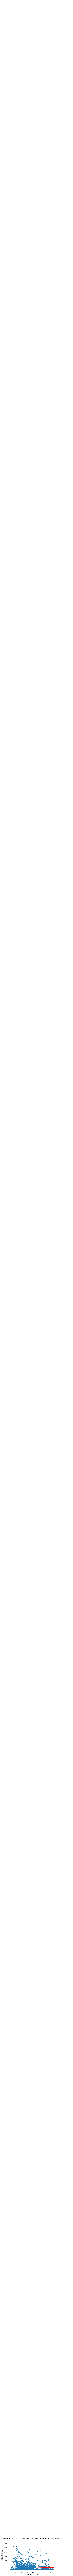

In [23]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["gage_height_ft"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["gage_height_ft"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["gage_height_ft"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_gage.png")
plt.show()

The r-value is: 0.5179478227126179
The r2-value is: 0.26826994705274143
The p-value is: 2.5054640725758246e-76


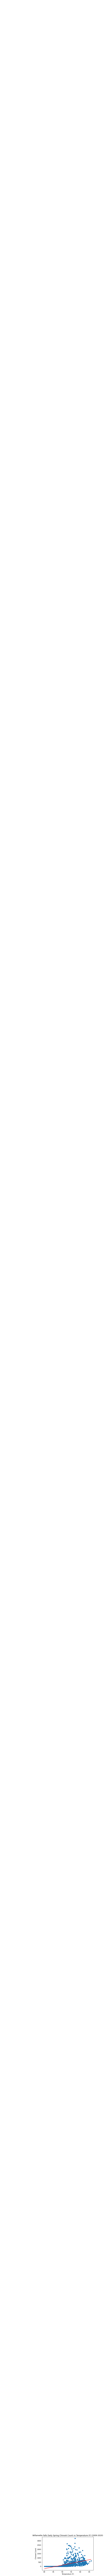

In [24]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(daily_salmon_willamette["temp_f"], 
                                                      daily_salmon_willamette["Chin"])
regress_values = daily_salmon_willamette["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature (F)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Daily Spring Chinook Count vs Temperature (F) (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(daily_salmon_willamette["temp_f"], regress_values, "r-")
ax.scatter(daily_salmon_willamette["temp_f"],daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_scatter_temp.png")
plt.show()

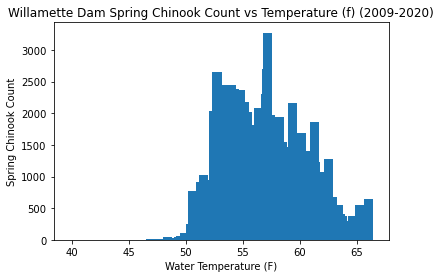

In [25]:
# Plot bar char distribution salmon vs temp
fig, ax = plt.subplots()
ax.set_xlabel("Water Temperature (F)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Temperature (f) (2009-2020)")
ax.bar(daily_salmon_willamette["temp_f"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_temp.png")
plt.show()

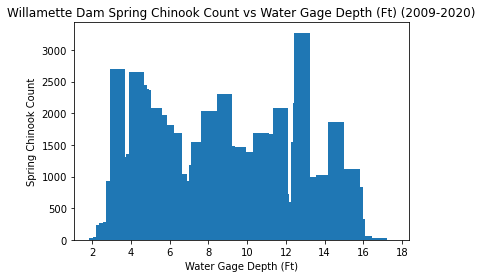

In [27]:
# Plot bar char distribution salmon vs temp
fig, ax = plt.subplots()
ax.set_xlabel("Water Gage Depth (Ft)")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Dam Spring Chinook Count vs Water Gage Depth (Ft) (2009-2020)")
ax.bar(daily_salmon_willamette["gage_height_ft"], daily_salmon_willamette["Chin"])
plt.savefig(daily_image_path + "will_daily_bar_gage.png")
plt.show()

In [29]:
#being imports for annual data

file_name2 = "Resources/Columbia_bonne_stevenson.csv"
Columbia_bonne_stevenson_df = pd.read_csv(file_name2, sep="\t")
Columbia_bonne_stevenson_df.head()

,agency_cd,site_no,datetime,Gage_Max,Status_Gage_Max,Gage_min,Status_gage_min,Gage_Mean,Status_Gage_Mean
0,USGS,14128600,2008-10-01,76.23,A,75.93,A,76.05,A
1,USGS,14128600,2008-10-02,76.33,A,76.03,A,76.21,A
2,USGS,14128600,2008-10-03,76.53,A,76.03,A,76.33,A
3,USGS,14128600,2008-10-04,76.33,A,76.03,A,76.11,A
4,USGS,14128600,2008-10-05,76.43,A,76.13,A,76.31,A


In [30]:
#read in willamette gage
w_merge_file = "Resources/willamette_water_gage.csv"

In [31]:
#create willamette gage df
willamette_gage_df = pd.read_csv(w_merge_file, sep="\t")
willamette_gage_df.head()

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,10/01/2007 01:00,PDT,3.21,A,NaN,NaN
1,USGS,14211720,10/01/2007 01:30,PDT,3.12,A,NaN,NaN
2,USGS,14211720,10/01/2007 02:00,PDT,2.89,A,NaN,NaN
3,USGS,14211720,10/01/2007 02:30,PDT,2.65,A,NaN,NaN
4,USGS,14211720,10/01/2007 03:00,PDT,2.38,A,NaN,NaN


In [33]:
#drop unnecessary columns
willamette_gage_df = willamette_gage_df.dropna()
willamette_gage_df = willamette_gage_df.reset_index(drop=True)
willamette_gage_df.head()

,agency_cd,site_no,datetime,tz_cd,gage_height_ft,gage_status,temp,temp_status
0,USGS,14211720,01/22/2009 00:00,PST,4.30,A,4.6,A
1,USGS,14211720,01/22/2009 00:30,PST,4.31,A,4.7,A
2,USGS,14211720,01/22/2009 01:00,PST,4.31,A,4.7,A
3,USGS,14211720,01/22/2009 01:30,PST,4.41,A,4.7,A
4,USGS,14211720,01/22/2009 02:00,PST,4.53,A,4.7,A


In [34]:
#clean df
willamette_gage_df = willamette_gage_df.drop(columns=['agency_cd', 'tz_cd', 'gage_status', 'temp_status'])
willamette_gage_df.head()

,site_no,datetime,gage_height_ft,temp
0,14211720,01/22/2009 00:00,4.30,4.6
1,14211720,01/22/2009 00:30,4.31,4.7
2,14211720,01/22/2009 01:00,4.31,4.7
3,14211720,01/22/2009 01:30,4.41,4.7
4,14211720,01/22/2009 02:00,4.53,4.7


In [35]:
#split datetime
willamette_gage_df[['date','time']] = willamette_gage_df['datetime'].str.split(' ', expand=True)
willamette_gage_df = willamette_gage_df.drop(columns=['datetime'])
willamette_gage_df = willamette_gage_df.reset_index(drop=True)
willamette_gage_df.head()

,site_no,gage_height_ft,temp,date,time
0,14211720,4.30,4.6,01/22/2009,00:00
1,14211720,4.31,4.7,01/22/2009,00:30
2,14211720,4.31,4.7,01/22/2009,01:00
3,14211720,4.41,4.7,01/22/2009,01:30
4,14211720,4.53,4.7,01/22/2009,02:00


In [36]:
#split date
willamette_gage_df[['month','day','Year']] = willamette_gage_df['date'].str.split('/', expand=True)
willamette_gage_df = willamette_gage_df.drop(columns=['date'])
willamette_gage_df.head()

,site_no,gage_height_ft,temp,time,month,day,Year
0,14211720,4.30,4.6,00:00,01,22,2009
1,14211720,4.31,4.7,00:30,01,22,2009
2,14211720,4.31,4.7,01:00,01,22,2009
3,14211720,4.41,4.7,01:30,01,22,2009
4,14211720,4.53,4.7,02:00,01,22,2009


In [43]:
willamette_gage_df['month'] = willamette_gage_df['month'].astype(int)
willamette_gage_df['day'] = willamette_gage_df['day'].astype(int)
willamette_gage_df['Year'] = willamette_gage_df['Year'].astype(int)

willamette_gage_df.dtypes

site_no             int64
gage_height_ft    float64
temp              float64
time               object
month               int32
day                 int32
Year                int32
dtype: object

In [44]:
willamette_gage_final= willamette_gage_df[(willamette_gage_df['month'] >= 3) & (willamette_gage_df['month'] <= 5)]
willamette_gage_final.head()

,site_no,gage_height_ft,temp,time,month,day,Year
1776,14211720,4.31,6.6,00:00,3,1,2009
1777,14211720,4.15,6.6,00:30,3,1,2009
1778,14211720,3.99,6.6,01:00,3,1,2009
1779,14211720,3.81,6.6,01:30,3,1,2009
1780,14211720,3.70,6.6,02:00,3,1,2009


In [45]:
willamette_gage_final = willamette_gage_final.groupby(['Year']).mean()
willamette_gage_final

,site_no,gage_height_ft,temp,month,day
Year,,,,,
2009,14211720,6.329968,10.153672,4.000695,15.648135
2010,14211720,4.833822,10.735210,4.011350,15.987028
2011,14211720,10.236951,9.533448,3.998163,15.795225
2012,14211720,10.390069,9.898923,4.000458,15.903344
2013,14211720,6.148852,11.589431,4.000227,15.842822
2014,14211720,8.795886,11.539873,4.000453,15.840054
2015,14211720,4.907156,13.215941,4.000227,15.835147
2016,14211720,7.401407,12.624575,4.001135,15.837304
2017,14211720,13.404161,10.525544,4.000453,15.837715


In [46]:
willamette_gage_final = willamette_gage_final.drop(columns=['month', 'day'])
willamette_gage_final['temp_f'] = willamette_gage_final['temp'] * 1.8 + 32
willamette_gage_final = willamette_gage_final.drop(columns=['temp'])
willamette_gage_final

,site_no,gage_height_ft,temp_f
Year,,,
2009,14211720,6.329968,50.276609
2010,14211720,4.833822,51.323377
2011,14211720,10.236951,49.160207
2012,14211720,10.390069,49.818062
2013,14211720,6.148852,52.860975
2014,14211720,8.795886,52.771772
2015,14211720,4.907156,55.788694
2016,14211720,7.401407,54.724234
2017,14211720,13.404161,50.945979


In [48]:
# Read in Willamette Dam Spring Chinook Counts
willamette_file = "Resources/Chinook_Willamette_Counts.csv"

# Grab only the columns we want
willamette_salmon_ann_df = pd.read_csv(willamette_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
willamette_salmon_ann_df =  willamette_salmon_ann_df[ 
    (willamette_salmon_ann_df["Year"] > 1999) & 
    (willamette_salmon_ann_df["Year"] < 2021)
]

# Clean up data types
willamette_salmon_ann_df["Year"] = willamette_salmon_ann_df["Year"].astype('int')
willamette_salmon_ann_df["Chinook"] = willamette_salmon_ann_df["Chinook"].astype('int')

willamette_salmon_ann_df.head()

,Project,Year,Dates,Chinook
0,Willamette Falls,2000,3/15 - 5/31,32475
1,Willamette Falls,2001,3/15 - 5/31,41417
2,Willamette Falls,2002,3/15 - 5/31,57163
3,Willamette Falls,2003,3/15 - 5/31,69118
4,Willamette Falls,2004,3/15 - 5/31,81837


In [49]:
willamette_mean_df = willamette_gage_final.drop(columns="temp_f")
willamette_mean_df.head()

,site_no,gage_height_ft
Year,,
2009,14211720,6.329968
2010,14211720,4.833822
2011,14211720,10.236951
2012,14211720,10.390069
2013,14211720,6.148852


In [50]:
merged_willamette_salmon_mean_df = pd.merge(willamette_salmon_ann_df, willamette_mean_df, on="Year")
merged_willamette_salmon_mean_df = merged_willamette_salmon_mean_df.drop(columns='site_no')
merged_willamette_salmon_mean_df.head()

,Project,Year,Dates,Chinook,gage_height_ft
0,Willamette Falls,2009,3/15 - 5/31,17057,6.329968
1,Willamette Falls,2010,3/15 - 5/31,43661,4.833822
2,Willamette Falls,2011,3/15 - 5/31,18970,10.236951
3,Willamette Falls,2012,3/15 - 5/31,20761,10.390069
4,Willamette Falls,2013,3/15 - 5/31,17821,6.148852


The r-value is: -0.4637390208434601
The r2-value is: 0.2150538794528511
The p-value is: 0.12888150994310013


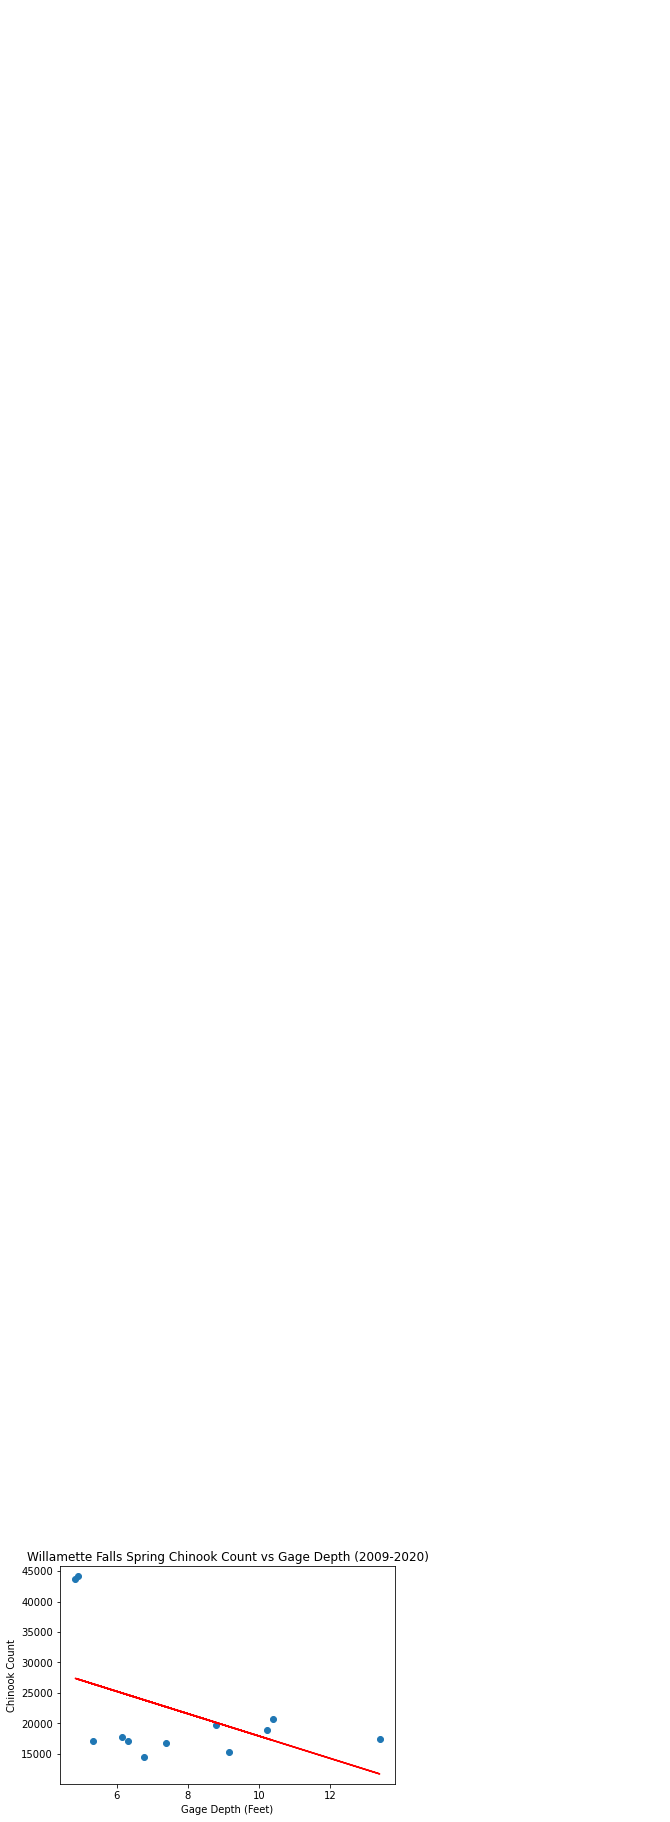

In [56]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_willamette_salmon_mean_df["gage_height_ft"], 
                                                      merged_willamette_salmon_mean_df["Chinook"])
regress_values = merged_willamette_salmon_mean_df["gage_height_ft"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Gage Depth (Feet)")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Gage Depth (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(merged_willamette_salmon_mean_df["gage_height_ft"], regress_values, "r-")
ax.scatter(merged_willamette_salmon_mean_df["gage_height_ft"],merged_willamette_salmon_mean_df["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_gage.png")
plt.show()

In [54]:
willamette_temp_df = willamette_gage_final.drop(columns="gage_height_ft")
willamette_temp_df.head()

,site_no,temp_f
Year,,
2009,14211720,50.276609
2010,14211720,51.323377
2011,14211720,49.160207
2012,14211720,49.818062
2013,14211720,52.860975


In [55]:
merged_willamette_salmon_temp_df = pd.merge(willamette_salmon_ann_df, willamette_temp_df, on="Year")
merged_willamette_salmon_temp_df = merged_willamette_salmon_temp_df.drop(columns='site_no')
merged_willamette_salmon_temp_df.head()

,Project,Year,Dates,Chinook,temp_f
0,Willamette Falls,2009,3/15 - 5/31,17057,50.276609
1,Willamette Falls,2010,3/15 - 5/31,43661,51.323377
2,Willamette Falls,2011,3/15 - 5/31,18970,49.160207
3,Willamette Falls,2012,3/15 - 5/31,20761,49.818062
4,Willamette Falls,2013,3/15 - 5/31,17821,52.860975


The r-value is: 0.28805660101776026
The r2-value is: 0.08297660538990512
The p-value is: 0.3639097578067054


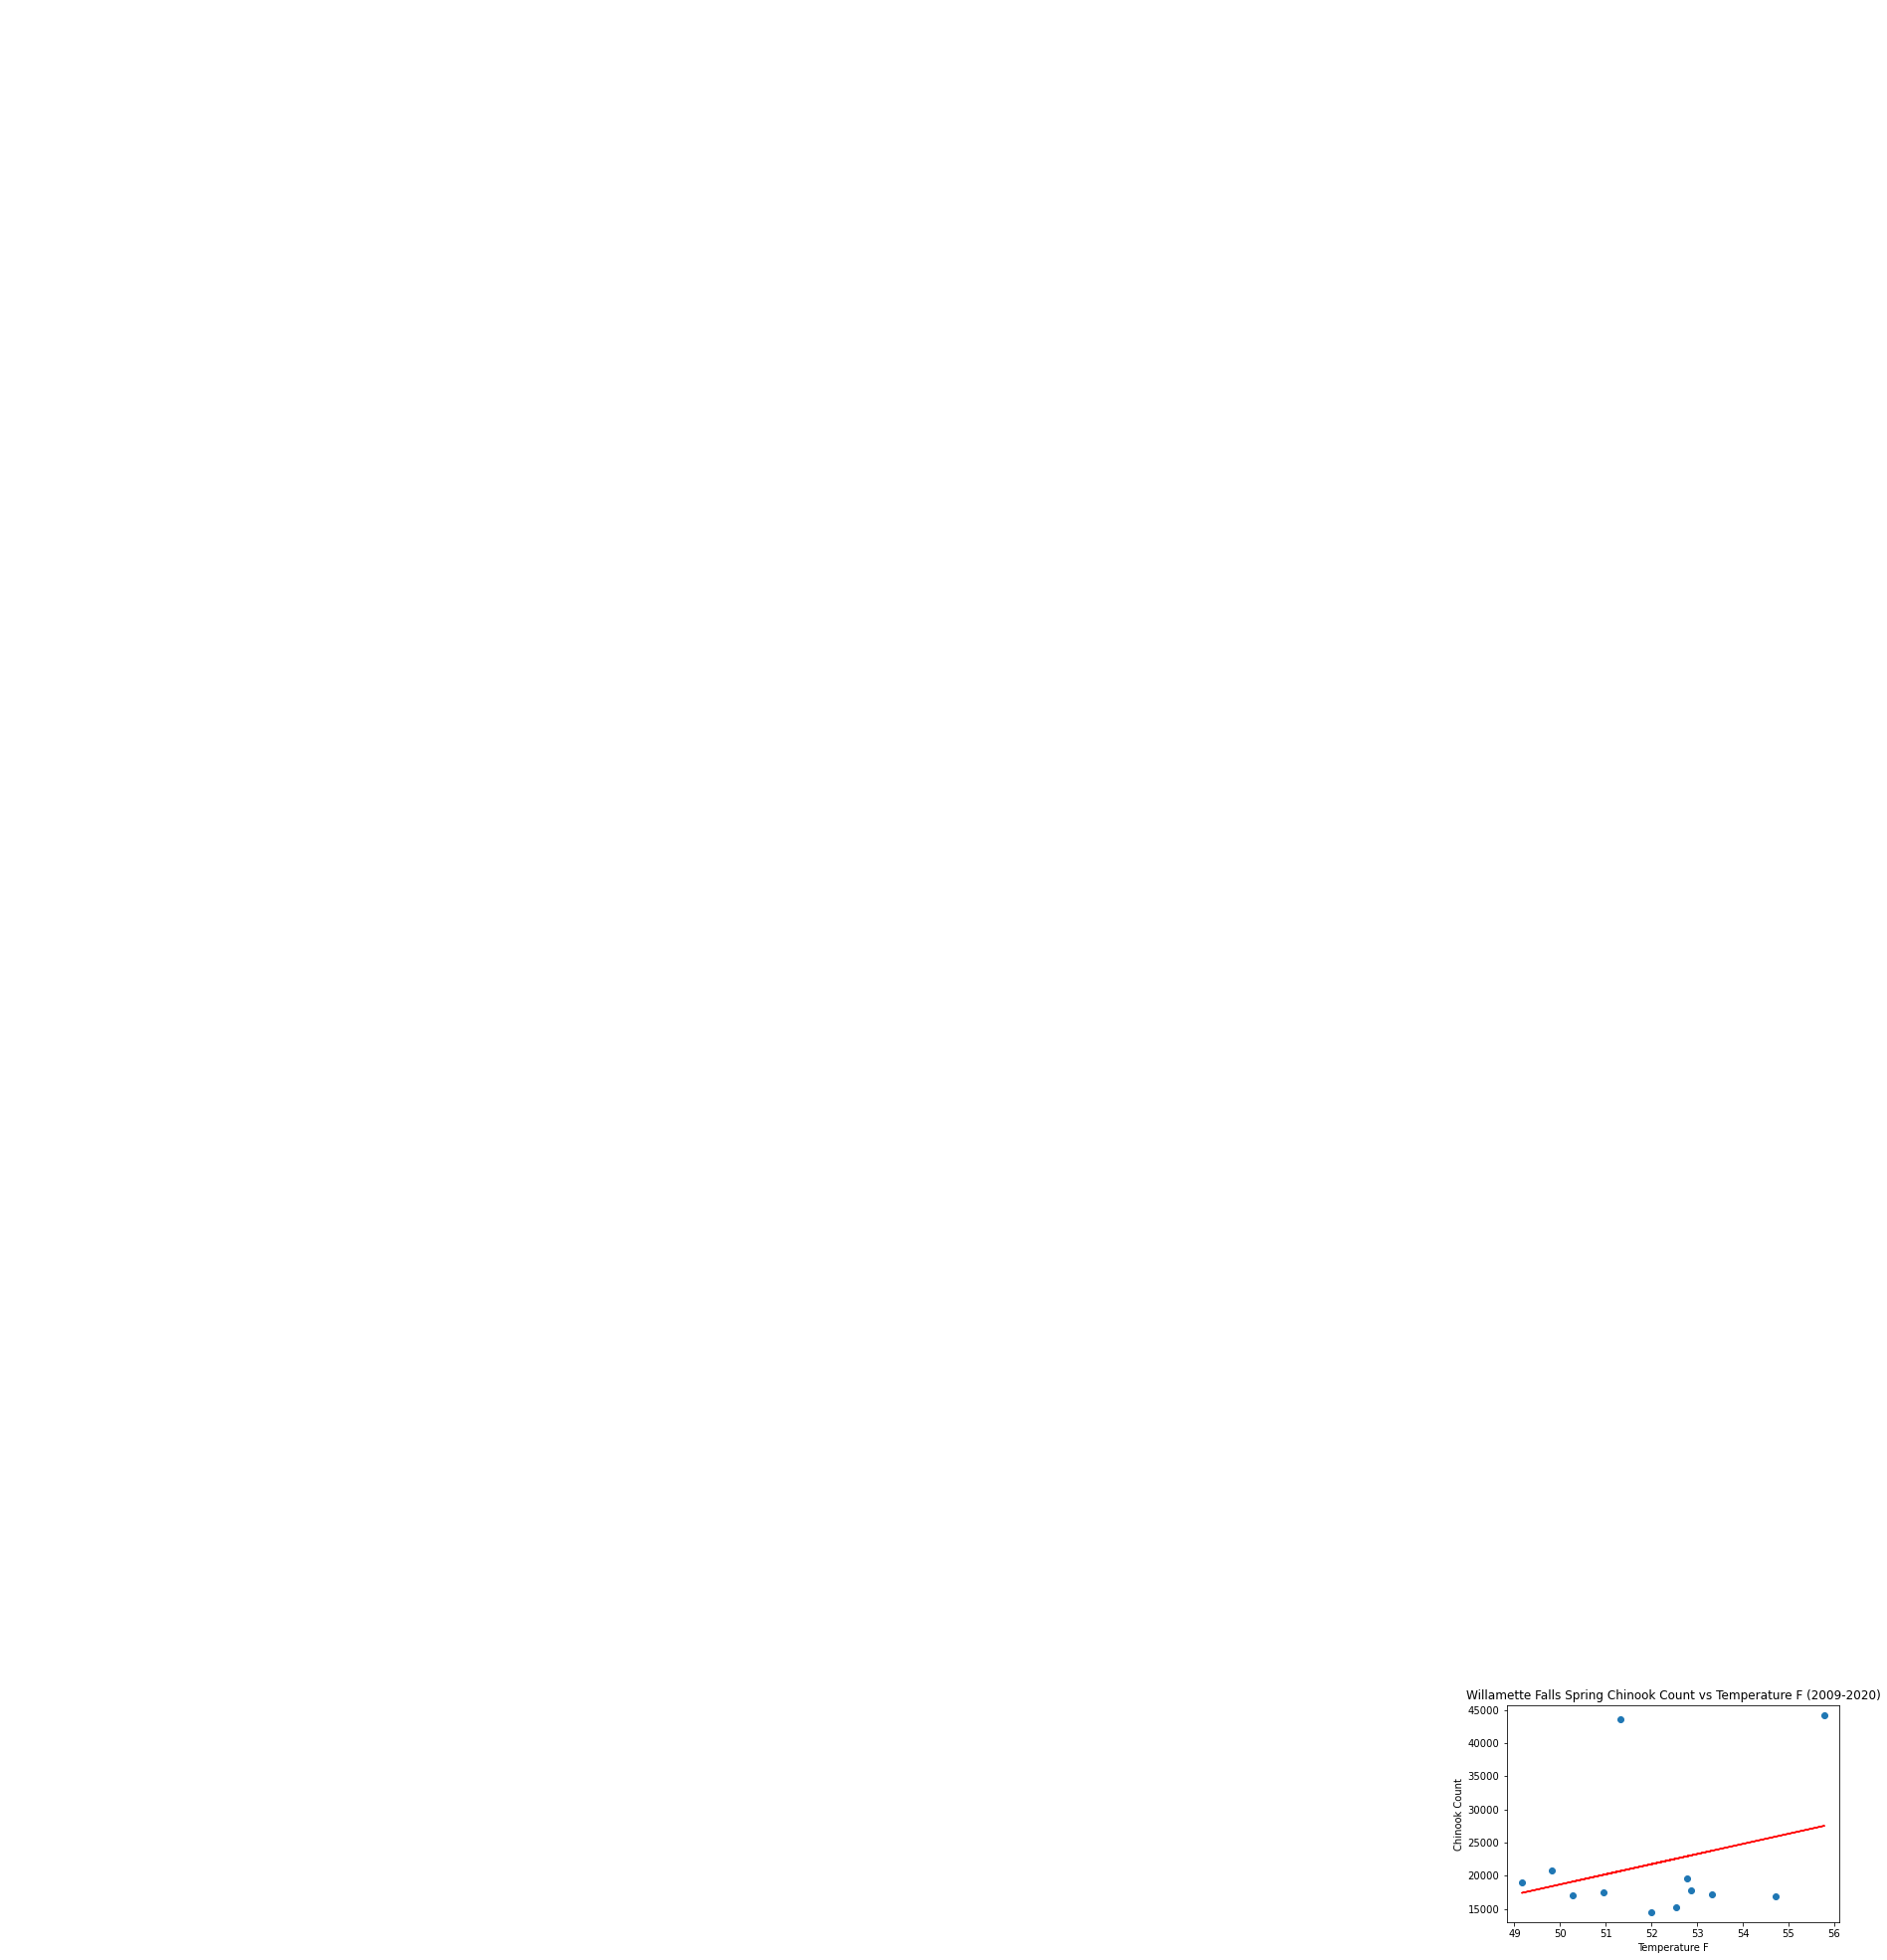

In [57]:
# Plot a scatter and regression of river depth and salmon counts to see if any correlation

slope, intercept, rvalue, pvalue, stderr = linregress(merged_willamette_salmon_temp_df["temp_f"], 
                                                      merged_willamette_salmon_temp_df["Chinook"])
regress_values = merged_willamette_salmon_temp_df["temp_f"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
print(f"The r2-value is: {rvalue**2}")
print(f"The p-value is: {pvalue}")

fig, ax = plt.subplots()
ax.set_xlabel("Temperature F")
ax.set_ylabel("Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Count vs Temperature F (2009-2020)")
ax.annotate(line_eq, (16,300000), fontsize=15, color="red")
ax.plot(merged_willamette_salmon_temp_df["temp_f"], regress_values, "r-")
ax.scatter(merged_willamette_salmon_temp_df["temp_f"],merged_willamette_salmon_temp_df["Chinook"])
plt.savefig(annual_image_path + "will_annual_scatter_temp.png")
plt.show()

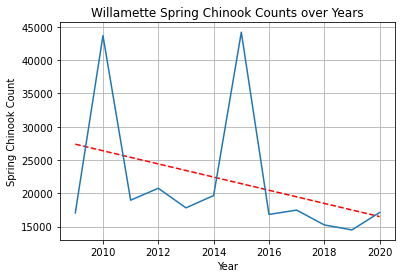

In [58]:
# Calculate a trend line
z = np.polyfit(merged_willamette_salmon_temp_df["Year"], merged_willamette_salmon_temp_df["Chinook"], 1)
p = np.poly1d(z)

# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(merged_willamette_salmon_temp_df["Year"],p(merged_willamette_salmon_temp_df["Year"]),"r--")
ax.plot(merged_willamette_salmon_temp_df["Year"], merged_willamette_salmon_temp_df["Chinook"] )
plt.savefig(annual_image_path + "will_annual_line_time.png")
plt.show()